In [333]:
# Importing libraries for the project

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
import re
from timeit import default_timer as timer

%matplotlib inline


## Step 1: Gathering data
#### a. gathering from downloaded twitter archive
#### b. gathering frrom given url (image predictions file)
#### c. gathering from twitter API

In [55]:
# Getting tweets data from the archive file

archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [56]:
archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [57]:
archive_df.shape

(2356, 17)

In [58]:
# Gathering data from the given url and saving it in a tsv file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url.split('/')[-1]

if not os.path.isfile(filename):
    response = requests.get('url')
    with open(filename, mode = 'wb') as file:
        file.write(response.content)
        
    

In [59]:
image_predictions_df = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [ ]:
# Gathering data from twitter API
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# Note that I did not recieve authentication from Twitter to use the API, So I used the given code in Udacity

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Saving the recieved data in the text file

filename = 'tweet_json.txt'
error_ids = []
if not os.path.isfile(filename):
    with open(filname, mode = 'wb') as file:
        for tweet_id in archive['tweet_id']:
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json.dump(tweet._json, file)
                file.write('\n')
            except:
                print("Fail")
                error_ids.append(tweet_id)

In [60]:
# Read the tweet_json text file and convert it to DataFrame
# Next line is just for testing, code is in next cell

with open('tweet-json.txt', mode = 'r') as file:
    line_ = json.loads(file.readline())
    print(line_['full_text'])

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


In [61]:
# Constructing the DataFrame:

df_list = []
columnss = ['tweet_id', 'retweet_count', 'favorite_count']

with open('tweet-json.txt', encoding='utf-8', mode = 'r') as file:
    for line in file:
        line_jsonn = json.loads(line)
        df_list.append([line_jsonn['id_str'], line_jsonn['retweet_count'], line_jsonn['favorite_count']])
        
api_df = pd.DataFrame(df_list, columns =  columnss)    

## Gathering is Finished, now on to assessing process.

#### Assessing is done using functions and methods such as: .info() .shape() .head() & .sample()
#### Conclusion of the Assessing process comes after the following lines of code.

In [51]:
archive_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None
1737,679530280114372609,NaN,NaN,2015-12-23 05:13:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this really needs to stop. We've been ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679530280...,7,10,a,None,None,None,None
1647,683828599284170753,NaN,NaN,2016-01-04 01:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking pupper here. Should be on the cov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683828599...,12,10,None,None,None,pupper,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
2051,671488513339211776,NaN,NaN,2015-12-01 00:38:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Julius. He's a cool dog. Carries seash...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671488513...,8,10,Julius,None,None,None,None
1454,695446424020918272,NaN,NaN,2016-02-05 03:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate unicorns but this one h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695446424...,12,10,None,None,None,None,None
989,748932637671223296,NaN,NaN,2016-07-01 17:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Divine Doggo. Must be magical af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748932637...,13,10,Divine,doggo,None,None,None
789,773985732834758656,NaN,NaN,2016-09-08 20:45:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winnie. She just made awkward eye contact...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773985732...,11,10,Winnie,None,None,pupper,None
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
936,753375668877008896,NaN,NaN,2016-07-13 23:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's mischievous af. Doesn't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


In [52]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [73]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [70]:
archive_df.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Marty        1
Angel        1
Brandi       1
Jed          1
Tito         1
Name: name, Length: 957, dtype: int64

In [71]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [62]:
archive_df.shape

(2356, 17)

In [63]:
image_predictions_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1740,822489057087389700,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,2.527060e-01,True,kuvasz,1.570280e-01,True
1001,708738143638450176,https://pbs.twimg.com/media/CdXxlFPWwAABaOv.jpg,1,Pomeranian,0.933457,True,Samoyed,5.722080e-02,True,West_Highland_white_terrier,9.041510e-04,True
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,1.664140e-02,True,ice_bear,1.485760e-02,False
1425,772193107915964416,https://pbs.twimg.com/media/Crdhh_1XEAAHKHi.jpg,1,Pembroke,0.367945,True,Chihuahua,2.235220e-01,True,Pekinese,1.648710e-01,True
238,670434127938719744,https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg,1,jack-o'-lantern,0.919140,False,Chesapeake_Bay_retriever,2.735100e-02,True,Labrador_retriever,2.008090e-02,True
841,694905863685980160,https://pbs.twimg.com/media/CaTNMUgUYAAB6vs.jpg,1,bow_tie,0.449268,False,fur_coat,1.390990e-01,False,black-footed_ferret,8.223200e-02,False
670,683098815881154561,https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg,1,golden_retriever,0.889848,True,kuvasz,5.300820e-02,True,Labrador_retriever,3.788120e-02,True
1506,785533386513321988,https://pbs.twimg.com/media/CubGchjXEAA6gpw.jpg,2,miniature_pinscher,0.436023,True,black-and-tan_coonhound,2.580490e-01,True,Rottweiler,1.452310e-01,True
148,668633411083464705,https://pbs.twimg.com/media/CUd2ieCUcAAexyT.jpg,1,Pekinese,0.589011,True,Shih-Tzu,3.909870e-01,True,Japanese_spaniel,3.310350e-03,True
1296,752173152931807232,https://pbs.twimg.com/media/CnBBfNuWcAAkOgO.jpg,1,Labrador_retriever,0.527659,True,German_shepherd,1.747650e-01,True,Chihuahua,4.552540e-02,True


In [64]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
image_predictions_df.shape

(2075, 12)

In [66]:
api_df.sample(20)

,tweet_id,retweet_count,favorite_count
1862,675362609739206656,262,1136
1457,695064344191721472,685,1771
2252,667782464991965184,261,434
1694,681242418453299201,624,1645
912,757393109802180609,2009,6462
219,850019790995546112,5459,21944
1275,709042156699303936,1864,5197
1368,702321140488925184,1156,3604
1588,686618349602762752,1544,4042
2335,666268910803644416,37,108


In [67]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [69]:
api_df.shape

(2354, 3)

1. Assessment results: 
   a: Archive_df: 
       Quality: (completeness, validity, accuracy, consistency)
       - tweet_id datatype better be string
       - 78 replies to be removed, along with their columns; ids, time..etc
       - 181 retweets to be removed, along with their columns; ids, time ...etc
       - tweets with no pictures to be removed
       - timestamp is object(str) with extra +0000, not datetime
       - some tweet data has incorrect dog names(name is only one lowercase letter)
       - some data in source column are incorrect
       - some tweet data has no urls 
       - some tweet data has weird values for nomenator and denomenator
       
       Tidiness:
       - column headers are categorical values (pupper floffo ...) and has to be merged into one column
       - rating denomenator can be removed, since it is fixed and known and nominator
         column name to change


    b: image_predictions_df:
         Quality & Tidiness:
        - names of some columns are not descriptive at all; p1, p1_conf, p2 ..etc
        - tweet_id datatype better to be string
        - 3 predictions columns are too much, only one prediction with the highest probabilty
          is needed. because if you look at other predictions probability, some
          are too small to be considered.


    c: api_df:
         Quality & Tidiness:
        - there are 2354 entries here, tweets with no images, retweets and replies have to
          be deleted


    Overall:
      - After cleaning process, 3 Dataframes can be combined in one Dataframes.
      
#### Note that we will not be addressing all the issues, rather we will work on most of them      

## Gathering Done
# --------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------

# Cleaning Process: 

In [119]:
# Making a copy of the dataframes

archive_clean_df = archive_df.copy()
images_clean_df = image_predictions_df.copy()
api_clean_df = api_df.copy()

In [120]:
# Testing the new dataframes
archive_clean_df.head()
images_clean_df.head()
api_clean_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### 1. In archive_clean_df convert tweed_id column datatype from int to string

In [121]:
# Coding the solution
archive_clean_df.tweet_id = archive_clean_df.tweet_id.astype(str)

In [122]:
# Testing the solution
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2. Remove tweet replies from the archive, and drop related columns 

In [123]:
# Coding the solution
archive_clean_df = archive_clean_df[archive_clean_df['in_reply_to_status_id'].isnull()]

In [124]:
# Testing the solution
archive_clean_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1549,689255633275777024,NaN,NaN,2016-01-19 01:18:43 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ferg. He swallowed a chainsaw. 1 like ...,NaN,NaN,NaN,https://vine.co/v/iOL792n5hz2,10,10,Ferg,None,None,None,None
1026,746131877086527488,NaN,NaN,2016-06-24 00:04:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustav. He has claimed that plant. It ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746131877...,10,10,Gustav,None,None,None,None
456,818259473185828864,NaN,NaN,2017-01-09 00:53:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Florence. He saw the same snap you sen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818259473...,12,10,Florence,None,None,None,None
851,765669560888528897,NaN,NaN,2016-08-16 22:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tove. She's a Balsamic Poinsetter. Sur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765669560...,12,10,Tove,None,None,None,None
715,783839966405230592,NaN,NaN,2016-10-06 01:23:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. His owner put a donut pillow ar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783839966...,13,10,Riley,None,None,None,None
1951,673686845050527744,NaN,NaN,2015-12-07 02:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He's upset that the 4th of Jul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673686845...,11,10,George,None,None,None,None
1991,672622327801233409,NaN,NaN,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327...,12,10,None,None,None,pupper,None
524,809220051211603969,NaN,NaN,2016-12-15 02:14:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyro. He's a Stratocumulus Flop. Tongu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/809220051...,12,10,Kyro,None,None,None,None
1783,677673981332312066,NaN,NaN,2015-12-18 02:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Endangered triangular pup here. Could be a wiz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677673981...,9,10,None,None,None,None,None
866,762035686371364864,NaN,NaN,2016-08-06 21:20:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This left me speechless. 14/10 heckin heroic a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762035686...,14,10,None,None,None,None,None


In [125]:
# Testing the solution
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

In [126]:
# Testing the solution
archive_clean_df.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

In [127]:
# Removing the unnecessary reply columns
archive_clean_df.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1, inplace = True)

In [128]:
# Testing Solution
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   object 
 1   timestamp                   2278 non-null   object 
 2   source                      2278 non-null   object 
 3   text                        2278 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2274 non-null   object 
 8   rating_numerator            2278 non-null   int64  
 9   rating_denominator          2278 non-null   int64  
 10  name                        2278 non-null   object 
 11  doggo                       2278 non-null   object 
 12  floofer                     2278 non-null   object 
 13  pupper                      2278 

### 3. Remove retweets from the archive, and drop related columns 

In [129]:
# Coding the solution
archive_clean_df = archive_clean_df[archive_clean_df['retweeted_status_id'].isnull()]

In [130]:
# Testing solution
archive_clean_df.sample(20)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1592,686394059078897668,2016-01-11 03:47:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pup's having a nightmare that he forgot t...,NaN,NaN,NaN,https://vine.co/v/iMqBebnOvav,12,10,None,None,None,None,None
1315,706681918348251136,2016-03-07 03:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Katie. She's a Mitsubishi Hufflep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706681918...,12,10,Katie,None,None,None,None
1524,690597161306841088,2016-01-22 18:09:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lolo. She's America af. Behind in scie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690597161...,11,10,Lolo,None,None,None,None
2002,672481316919734272,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,None,None,pupper,None
151,862831371563274240,2017-05-12 00:46:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zooey. She's the world's biggest fan o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862831371...,13,10,Zooey,None,None,None,None
1935,674008982932058114,2015-12-07 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup is sad bc he didn't get to be the toy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674008982...,10,10,None,None,None,None,None
87,875144289856114688,2017-06-15 00:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Nugget and Hank. Nugget took Hank's bone....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875144289...,13,10,Nugget,None,None,None,None
242,846153765933735936,2017-03-27 00:15:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vixen. He really likes bananas. Steals...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846153765...,13,10,Vixen,None,None,None,None
648,793120401413079041,2016-10-31 16:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Robin. She's desperately trying to do ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793120401...,11,10,Robin,None,None,None,None
821,770293558247038976,2016-08-29 16:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. There's nothing abnormal abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770293558...,10,10,Jackson,None,None,None,None


In [131]:
# Testing solution
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   timestamp                   2097 non-null   object 
 2   source                      2097 non-null   object 
 3   text                        2097 non-null   object 
 4   retweeted_status_id         0 non-null      float64
 5   retweeted_status_user_id    0 non-null      float64
 6   retweeted_status_timestamp  0 non-null      object 
 7   expanded_urls               2094 non-null   object 
 8   rating_numerator            2097 non-null   int64  
 9   rating_denominator          2097 non-null   int64  
 10  name                        2097 non-null   object 
 11  doggo                       2097 non-null   object 
 12  floofer                     2097 non-null   object 
 13  pupper                      2097 

In [132]:
# Coding part 2 of the solution
archive_clean_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

In [133]:
# Testing solution
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


### 4. Remove the extra +0000 & change timestamp column datatype to datetime.

In [134]:
# Coding part 1 of solution
archive_clean_df.timestamp = archive_clean_df.timestamp.str.strip('+0000')

In [135]:
# Testing part 1 of solution
archive_clean_df.timestamp[0:3]

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
Name: timestamp, dtype: object

In [136]:
archive_clean_df.timestamp.sample(50)

1546    2016-01-19 03:10:43 
1292    2016-03-11 01:56:49 
1001    2016-06-28 23:23:19 
1815    2015-12-15 04:05:01 
1841    2015-12-13 03:21:34 
1769    2015-12-20 01:03:46 
1579    2016-01-13 16:36:55 
2225    2015-11-22 04:33:59 
370     2017-02-06 01:07:28 
633     2016-11-02 16:00:06 
1616    2016-01-07 20:39:06 
2067    2015-11-30 01:39:49 
2249    2015-11-21 00:25:26 
830     2016-08-25 16:58:45 
100     2017-06-08 14:20:41 
2229    2015-11-22 02:03:45 
1076    2016-06-05 23:53:41 
243     2017-03-26 23:20:02 
1512    2016-01-24 18:09:23 
1621    2016-01-07 02:38:10 
1070    2016-06-08 01:45:19 
1946    2015-12-07 03:28:45 
1078    2016-06-05 15:54:48 
93      2017-06-12 00:15:36 
887     2016-08-01 01:28:46 
1828    2015-12-14 04:52:55 
391     2017-01-30 23:05:46 
1568    2016-01-15 02:08:05 
1482    2016-01-30 02:58:42 
50      2017-07-05 15:48:34 
2017    2015-12-02 21:06:56 
1800    2015-12-16 04:01:59 
1103    2016-05-24 23:47:49 
2031    2015-12-01 19:10:13 
2227    2015-1

In [137]:
# Coding part 2 of solution
archive_clean_df.timestamp = pd.to_datetime(archive_clean_df.timestamp)

In [138]:
# Testing part 2 of solution
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### 5. Remove tweets without images:

In [165]:
# coding the solution
archive_clean_df.reset_index(drop = True, inplace = True)

images_clean_df['tweet_id'] = images_clean_df['tweet_id'].astype(str)

In [166]:
all_ids_list = archive_clean_df['tweet_id']
img_ids_list = images_clean_df['tweet_id']
img_ids_list

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

In [171]:
all_ids_list

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2092    666049248165822465
2093    666044226329800704
2094    666033412701032449
2095    666029285002620928
2096    666020888022790149
Name: tweet_id, Length: 2097, dtype: object

In [222]:
no_img_id_list = []

# Getting the IDs that are contained in the archive but not in the Image prediction file, meaning that these IDs points to the
# tweets with no images!
no_img_id_list = list(set(all_ids_list) - set(img_ids_list))
print(len(no_img_id_list))

# Iterating through each ID in the list, removing its whole row from the dataframe
for num in no_img_id_list:
    archive_clean_df = archive_clean_df[archive_clean_df.tweet_id != num]    
    
#for num in all_ids_list:
    #if num not in img_ids_list:
        #no_img_id_list.append(num)
        

126


In [225]:
# Testing solution
archive_clean_df.reset_index(drop = True, inplace = True)
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   doggo               1971 non-null   object        
 9   floofer             1971 non-null   object        
 10  pupper              1971 non-null   object        
 11  puppo               1971 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 184.9+ KB


### 6. Changing the incorrect dog names to None.

In [247]:
archive_clean_df.name.value_counts()

None       524
a           55
Charlie     11
Lucy        10
Cooper      10
          ... 
Reptar       1
Ruffles      1
Rorie        1
Goose        1
Tito         1
Name: name, Length: 935, dtype: int64

In [248]:
# Coding the solution
# By examining the data, it turns out that all incorrect names start with lowercase letter
# So we are going to use this to replace all incorrect names with None
for name in archive_clean_df.name:
    if name[0] == name[0].lower():
        archive_clean_df.name.replace(name,'None', inplace=True)
        
# If there are any null values, fill it with None        
archive_clean_df.name.fillna('None', inplace = True)        
    

In [249]:
# Testing Solution
archive_clean_df.name.value_counts()

None       622
Charlie     11
Oliver      10
Lucy        10
Cooper      10
          ... 
Reptar       1
Ruffles      1
Rorie        1
Goose        1
Tito         1
Name: name, Length: 913, dtype: int64

In [250]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   doggo               1971 non-null   object        
 9   floofer             1971 non-null   object        
 10  pupper              1971 non-null   object        
 11  puppo               1971 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 184.9+ KB


In [254]:
archive_clean_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

### 7. Merging the 3 DataFrames into one master DataFrame based on common tweet ids in tweet_id column:
#### By mergin now, we get rid of the extra rows in images_clean_df & api_clean_df, which are related to replies and retweets

In [255]:
# Coding solution
api_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [263]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   doggo               1971 non-null   object        
 9   floofer             1971 non-null   object        
 10  pupper              1971 non-null   object        
 11  puppo               1971 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 184.9+ KB


In [264]:
images_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [256]:
first_merge_df = pd.merge(archive_clean_df, api_clean_df, on = 'tweet_id') 

In [257]:
first_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   doggo               1971 non-null   object        
 9   floofer             1971 non-null   object        
 10  pupper              1971 non-null   object        
 11  puppo               1971 non-null   object        
 12  retweet_count       1971 non-null   int64         
 13  favorite_count      1971 non-null   int64       

In [261]:
master_df = pd.merge(first_merge_df, images_clean_df, on = 'tweet_id') 

In [262]:
# We observe that only rows with common tweet ids were merged with the first dataframe, excluding rows with retweets & replies in
# second and third dataframe
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   doggo               1971 non-null   object        
 9   floofer             1971 non-null   object        
 10  pupper              1971 non-null   object        
 11  puppo               1971 non-null   object        
 12  retweet_count       1971 non-null   int64         
 13  favorite_count      1971 non-null   int64       

### 8. Changing the names of predictions columns into more descriptive ones:


In [268]:
# Coding solution

new_names_dict = {'p1':'1st_prediction','p1_conf':'1st_confidence','p1_dog':'1st_breed','p2':'2nd_prediction','p2_conf':'2nd_confidence','p2_dog':'2nd_breed',
                 'p3':'3rd_prediction','p3_conf':'3rd_confidence','p3_dog':'3rd_breed'}

master_df.rename(columns = new_names_dict, inplace = True)

In [269]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   doggo               1971 non-null   object        
 9   floofer             1971 non-null   object        
 10  pupper              1971 non-null   object        
 11  puppo               1971 non-null   object        
 12  retweet_count       1971 non-null   int64         
 13  favorite_count      1971 non-null   int64       

In [270]:
master_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,1st_prediction,1st_confidence,1st_breed,2nd_prediction,2nd_confidence,2nd_breed,3rd_prediction,3rd_confidence,3rd_breed
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### 9. Interpret source column using regex library, for better representation:

In [271]:
# Coding solution
# Using findall function to extract the source
master_df['source'] = master_df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [272]:
# Testing solution

master_df.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### 10. melting/merging the 4 dog types columns in one column named dog_type, and using the 4 headers       (doggo,floofer, pupper, puppo) as values for the new column.

### 11. Correcting values in the new dog_type column.

In [288]:
# Coding solution
# Forming the new column by simply adding the 4 columns values to it
# Could be done using melting but this is a simpler method
master_df['dog_type'] = master_df['doggo'] + master_df['floofer'] + master_df['pupper'] + master_df['puppo']

In [289]:
master_df.dog_type.value_counts()

NoneNoneNoneNone        1668
NoneNonepupperNone       201
doggoNoneNoneNone         63
NoneNoneNonepuppo         22
doggoNonepupperNone        8
NoneflooferNoneNone        7
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_type, dtype: int64

In [302]:
# Constructing the dog_type column with the originally given values
master_df['dog_type'] = master_df.dog_type.replace('NoneNoneNoneNone','None')
master_df['dog_type'] = master_df.dog_type.replace('NoneNonepupperNone','pupper')
master_df['dog_type'] = master_df.dog_type.replace('doggoNoneNoneNone','doggo')
master_df['dog_type'] = master_df.dog_type.replace('NoneNoneNonepuppo','puppo')
master_df['dog_type'] = master_df.dog_type.replace('doggoNonepupperNone','doggo/pupper')
master_df['dog_type'] = master_df.dog_type.replace('NoneflooferNoneNone','floofer')
master_df['dog_type'] = master_df.dog_type.replace('doggoflooferNoneNone','doggo/floofer')
master_df['dog_type'] = master_df.dog_type.replace('doggoNoneNonepuppo','doggo/puppo')

In [303]:
master_df.dog_type.value_counts()

None             1668
pupper            201
doggo              63
puppo              22
doggo/pupper        8
floofer             7
doggo/floofer       1
doggo/puppo         1
Name: dog_type, dtype: int64

In [304]:
# Dropping the unneeded 4 dog types columns
master_df.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

In [305]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   retweet_count       1971 non-null   int64         
 9   favorite_count      1971 non-null   int64         
 10  jpg_url             1971 non-null   object        
 11  img_num             1971 non-null   int64         
 12  1st_prediction      1971 non-null   object        
 13  1st_confidence      1971 non-null   float64     

In [313]:
# Investigating why there are two types doggo/pupper here, and trying to find the correct type
master_df[master_df.dog_type == 'doggo/pupper']['text']

337    This is Dido. She's playing the lead role in "...
394    Here we have Burke (pupper) and Dexter (doggo)...
421    This is Bones. He's being haunted by another d...
506    This is Pinot. He's a sophisticated doggo. You...
648    Meet Maggie &amp; Lila. Maggie is the doggo, L...
700    Please stop sending it pictures that don't eve...
789    This is just downright precious af. 12/10 for ...
835    Like father (doggo), like son (pupper). Both 1...
Name: text, dtype: object


In [316]:
# Displaying the tweets
id_list = [337,394,421,506,648,700,789,835]
for num in id_list:
    print(master_df[master_df.dog_type == 'doggo/pupper']['text'][num])

This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
Like f

In [319]:
# Based on the tweets, we will write the ids that needs to change its dog type as well as the correct type  
ids_list = [337,421,506,700]
correct_type_list = ['doggo','pupper','doggo','None']    

# Correcting the values in dog_type column, based on text and using the two lists of indices and values in previous line
master_df.loc[[337,506],'dog_type'] = 'doggo'
master_df.loc[[421],'dog_type'] = 'pupper'
master_df.loc[[700],'dog_type'] = 'None'

In [320]:
master_df.dog_type.value_counts()

None             1669
pupper            202
doggo              65
puppo              22
floofer             7
doggo/pupper        4
doggo/floofer       1
doggo/puppo         1
Name: dog_type, dtype: int64

In [322]:
# Investigating the remaining
print(master_df[master_df.dog_type == 'doggo/floofer']['text'][152])
print(master_df[master_df.dog_type == 'doggo/puppo']['text'][146])

At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel


In [323]:
# correcting the values
master_df.loc[[146],'dog_type'] = 'puppo'
master_df.loc[[152],'dog_type'] = 'floofer'

In [324]:
# Testing
master_df.dog_type.value_counts()

None            1669
pupper           202
doggo             65
puppo             23
floofer            8
doggo/pupper       4
Name: dog_type, dtype: int64

In [325]:
master_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,1st_prediction,1st_confidence,1st_breed,2nd_prediction,2nd_confidence,2nd_breed,3rd_prediction,3rd_confidence,3rd_breed,dog_type
1865,667873844930215936,2015-11-21 01:15:07,Twitter for iPhone,Neat dog. Lots of spikes. Always in push-up po...,https://twitter.com/dog_rates/status/667873844...,10,10,None,440,667,...,common_iguana,0.999647,False,frilled_lizard,0.000181,False,African_chameleon,0.000128,False,None
1430,677547928504967168,2015-12-17 17:56:29,Twitter for iPhone,Not much to say here. I just think everyone ne...,https://twitter.com/dog_rates/status/677547928...,12,10,None,4076,7568,...,American_Staffordshire_terrier,0.914978,True,Staffordshire_bullterrier,0.084395,True,boxer,0.000462,True,None
1729,670465786746662913,2015-11-28 04:54:34,Twitter for iPhone,Silly dog here. Wearing bunny ears. Nice long ...,https://twitter.com/dog_rates/status/670465786...,7,10,None,608,1048,...,axolotl,0.611558,False,tailed_frog,0.186484,False,common_newt,0.078694,False,None
753,746790600704425984,2016-06-25 19:42:08,Twitter for iPhone,When you just can't resist... 10/10 topnotch t...,https://twitter.com/dog_rates/status/746790600...,10,10,None,1806,5345,...,Boston_bull,0.936183,True,guinea_pig,0.010084,False,Cardigan,0.010077,True,None
1349,680940246314430465,2015-12-27 02:36:20,Twitter for iPhone,This is Alice. She's an idiot. 4/10 https://t....,https://twitter.com/dog_rates/status/680940246...,4,10,Alice,1225,3544,...,soft-coated_wheaten_terrier,0.289598,True,West_Highland_white_terrier,0.157195,True,toy_poodle,0.074435,True,None


### 12. Since we have 3 prediction columns, we will try to construct only one column with the best prediction, then dropping the old prediction columns

In [339]:
# Coding solution
dog_breed = []
accuracy_percentage = []

# following function is used to loop through all prediction column to choose the best one
def breed_choice(row):
    if row['1st_breed'] == True:
        dog_breed.append(row['1st_prediction'])
        accuracy_percentage.append(row['1st_confidence'])
    elif row['2nd_breed'] == True:
        dog_breed.append(row['2nd_prediction'])
        accuracy_percentage.append(row['2nd_confidence'])
    elif row['3rd_breed'] == True:
        dog_breed.append(row['3rd_prediction'])
        accuracy_percentage.append(row['3rd_confidence'])
    else:
        dog_breed.append('None')
        accuracy_percentage.append(0)
        
# call function using pandas apply by columns
master_df.apply(breed_choice, axis=1)

# add lists created to new columns in the master dataframe
master_df['breed'] = dog_breed
master_df['confidence'] = accuracy_percentage

In [340]:
master_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_of_10,name,retweet_count,favorite_count,jpg_url,...,1st_breed,2nd_prediction,2nd_confidence,2nd_breed,3rd_prediction,3rd_confidence,3rd_breed,dog_type,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,None,None,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,None,Chihuahua,0.323581


In [341]:
# Dropping excess prediction columns
master_df.drop(['1st_prediction','1st_confidence','1st_breed','2nd_prediction','2nd_confidence','2nd_breed','3rd_prediction','3rd_confidence','3rd_breed'], 
               axis=1, inplace = True)

In [342]:
master_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_of_10,name,retweet_count,favorite_count,jpg_url,img_num,dog_type,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,None,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,None,Chihuahua,0.323581


### 13. Dropping denomenator column, since it should hold a fixed value of 10. And changing the name of numenator column.

In [326]:
master_df.drop('rating_denominator', axis = 1, inplace = True)
master_df.rename(columns = {'rating_numerator':'rating_of_10'}, inplace = True)

In [343]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1971 non-null   object        
 1   timestamp       1971 non-null   datetime64[ns]
 2   source          1971 non-null   category      
 3   text            1971 non-null   object        
 4   expanded_urls   1971 non-null   object        
 5   rating_of_10    1971 non-null   int64         
 6   name            1971 non-null   object        
 7   retweet_count   1971 non-null   int64         
 8   favorite_count  1971 non-null   int64         
 9   jpg_url         1971 non-null   object        
 10  img_num         1971 non-null   int64         
 11  dog_type        1971 non-null   category      
 12  breed           1971 non-null   object        
 13  confidence      1971 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(4),

In [344]:
master_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_of_10,name,retweet_count,favorite_count,jpg_url,img_num,dog_type,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,None,0.0


### 14. As we are wrapping up cleaning and moving to analyzing, we are going to revise and make some fine tuning to the data, change some columns data types and drop the columns that might not come in handy during analyzing

In [330]:
# Coding
master_df['source'] = master_df['source'].astype('category')
master_df['dog_type'] = master_df['dog_type'].astype('category')

In [347]:
master_df.drop(['expanded_urls', 'img_num'], axis = 1, inplace = True)

In [348]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1971 non-null   object        
 1   timestamp       1971 non-null   datetime64[ns]
 2   source          1971 non-null   category      
 3   text            1971 non-null   object        
 4   rating_of_10    1971 non-null   int64         
 5   name            1971 non-null   object        
 6   retweet_count   1971 non-null   int64         
 7   favorite_count  1971 non-null   int64         
 8   jpg_url         1971 non-null   object        
 9   dog_type        1971 non-null   category      
 10  breed           1971 non-null   object        
 11  confidence      1971 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 253.5+ KB


In [433]:
# Saving to CSV file
master_df.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

##                                                     Cleaning Done
# ------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------

## Analyzing the data:

### We can answer the following questions:
#### 1. Which breed gets the highest tweet count?
#### 2. Which breed gets the highest rating ?
#### 3. Which breed gets highest number of likes / favorites? 

#### We will try to provide visualizations for most of the questions

In [404]:
# Before start of analysis, copy the master dataframe into a new one

dogs_df = master_df.copy()

In [405]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1971 non-null   object        
 1   timestamp       1971 non-null   datetime64[ns]
 2   source          1971 non-null   category      
 3   text            1971 non-null   object        
 4   rating_of_10    1971 non-null   int64         
 5   name            1971 non-null   object        
 6   retweet_count   1971 non-null   int64         
 7   favorite_count  1971 non-null   int64         
 8   jpg_url         1971 non-null   object        
 9   dog_type        1971 non-null   category      
 10  breed           1971 non-null   object        
 11  confidence      1971 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 253.5+ KB


### Answer: Which breed gets the highest tweet count?

In [406]:
# Getting number of tweets per breed:

dogs_df.breed.value_counts()

None                    305
golden_retriever        156
Labrador_retriever      106
Pembroke                 94
Chihuahua                90
                       ... 
standard_schnauzer        1
silky_terrier             1
Japanese_spaniel          1
Bouvier_des_Flandres      1
EntleBucher               1
Name: breed, Length: 114, dtype: int64

#### From the above table, it shows that golden retriever breed is the most tweeted on the list. So we can conclude that it is more popular than other breeds

#### We also note that there are 305 tweets without a certain breed or classifications, these tweets values are unwanted in our analysis as it won't give much information so better be removed/null.

In [407]:
dogs_df.loc[dogs_df['breed'] == 'None', 'breed'] = None

In [408]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1971 non-null   object        
 1   timestamp       1971 non-null   datetime64[ns]
 2   source          1971 non-null   category      
 3   text            1971 non-null   object        
 4   rating_of_10    1971 non-null   int64         
 5   name            1971 non-null   object        
 6   retweet_count   1971 non-null   int64         
 7   favorite_count  1971 non-null   int64         
 8   jpg_url         1971 non-null   object        
 9   dog_type        1971 non-null   category      
 10  breed           1666 non-null   object        
 11  confidence      1971 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 253.5+ KB


In [409]:
# Revisiting the number of tweets per breed again:
dogs_df.breed.value_counts()

golden_retriever        156
Labrador_retriever      106
Pembroke                 94
Chihuahua                90
pug                      62
                       ... 
standard_schnauzer        1
Japanese_spaniel          1
silky_terrier             1
Bouvier_des_Flandres      1
Scotch_terrier            1
Name: breed, Length: 113, dtype: int64

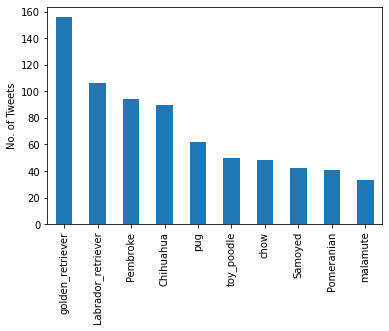

In [410]:

dogs_df.breed.value_counts().nlargest(10).plot(kind='bar').set_ylabel('No. of Tweets');

#### Plot confirms our conclusion about golden retriever breed

###### -------------------------------------------------------------------------------

### Answer: Which breed gets the highest rating ?

In [411]:
dogs_df.rating_of_10.value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_of_10, dtype: int64

In [414]:
# Removing outliers
# We will remove values higher than 14

dogs_df = dogs_df[dogs_df['rating_of_10'] <= 14] 

In [415]:
dogs_df.rating_of_10.value_counts()

12    446
10    417
11    392
13    253
9     150
8      95
7      52
14     33
5      33
6      32
3      19
4      16
2       9
1       5
0       1
Name: rating_of_10, dtype: int64

In [421]:
dogs_df.groupby('breed')['rating_of_10'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Afghan_hound,3.0,9.666667,5.773503,3.0,8.00,13.0,13.00,13.0
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,16.0,10.312500,3.070695,0.0,10.00,11.0,12.00,13.0
Appenzeller,2.0,11.000000,2.828427,9.0,10.00,11.0,12.00,13.0
Australian_terrier,2.0,11.500000,2.121320,10.0,10.75,11.5,12.25,13.0
...,...,...,...,...,...,...,...,...
toy_poodle,50.0,11.000000,1.245400,7.0,10.00,11.0,12.00,13.0
toy_terrier,3.0,10.333333,1.527525,9.0,9.50,10.0,11.00,12.0
vizsla,13.0,10.846154,1.281025,8.0,11.00,11.0,11.00,13.0


In [426]:
# In order to compare highest rating breeds, we focus on the mean values for the highest 10 or 8 breeds
# by grouping the values by breed
dogs_df.groupby('breed')['rating_of_10'].describe()['mean'].nlargest(10)

breed
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Border_terrier          12.142857
silky_terrier           12.000000
standard_schnauzer      12.000000
Gordon_setter           11.750000
Irish_setter            11.750000
Samoyed                 11.690476
Name: mean, dtype: float64

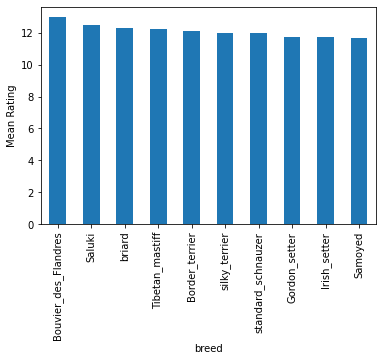

In [428]:
# Plotting
dogs_df.groupby('breed')['rating_of_10'].describe()['mean'].nlargest(10).plot(kind='bar').set_ylabel('Mean Rating');

#### We conclude that highest rating breed is Bouvier des Flandres

###### ------------------------------------------------------------------------

### Answer: which breed gets the most number of likes?

In [431]:
# Grouping by breed nad showing the sum of likes column
dogs_df.groupby('breed')['favorite_count'].sum().nlargest(20)

breed
golden_retriever             1934793
Labrador_retriever           1253364
Pembroke                     1038797
Chihuahua                     743689
Samoyed                       583906
French_bulldog                570921
chow                          443610
cocker_spaniel                407412
pug                           383817
toy_poodle                    337270
malamute                      332859
Chesapeake_Bay_retriever      302246
Pomeranian                    291008
Cardigan                      269644
Eskimo_dog                    235104
German_shepherd               217469
Lakeland_terrier              203194
basset                        199955
miniature_pinscher            199080
Staffordshire_bullterrier     189770
Name: favorite_count, dtype: int64

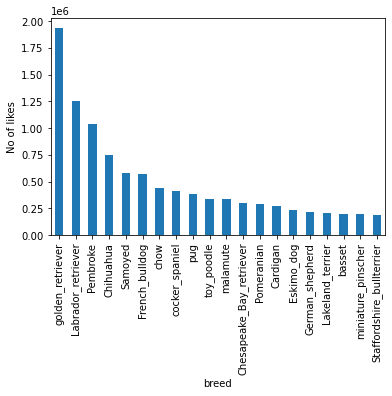

In [432]:
# Plotting the 20 most liked breeds
dogs_df.groupby('breed')['favorite_count'].sum().nlargest(20).plot(kind = 'bar').set_ylabel('No of likes');

#### From the plot and analysis, here are the most liked breeds in our data with Golden Retriever on top once again

##          End of work

##          Thank You! 